# UFSCAR - ACIEPE - Programação Paralela 

## Identificação :
### Aluno :Yago David Pimenta  RA:800273


## **Problema Abordado** : Ordenação
#### Irei abordar alguns algoritmos de ordenação com grande volume de dados ,tal como : quicksort , mergesort , insertsort ...  porém vamos utilizar a biblioteca numba do python para ver se é possível melhorar o desempenho do algoritmo .

 *Observação* : Como os códigos são simples , não foi necessário clonar o repositório de terceiros para  fazer essa adaptação , irei partir por conta própria .

### Primeiro Passo : Abordar os problemas sequenciais e verificar o tempo gasto por cada um deles 

( Input com 1 milhão de elementos)

In [1]:
import random
import timeit
arr = [random.randint(0, 1000000000) for i in range(1000000)]

#### 1 - Selection Sort

In [ ]:
def selection_sort(arr):
    n = len(arr)
    
    # Traverse through all array elements
    for i in range(n):
        
        # Find the minimum element in remaining unsorted array
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
                
        # Swap the found minimum element with the first element        
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    
    return arr


In [ ]:
start_time = timeit.default_timer()
selection_sort(arr)
print("O tempo gasto foi ",timeit.default_timer()-start_time)

KeyboardInterrupt: ignored

Não Rodou para 1 milhão de elementos , porém não vamos diminuir pois rodou para os outros casos .

#### 2 - MergeSort

In [ ]:
def merge_sort(arr):
    if len(arr) > 1:
        # Divide the array into two halves
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]
        
        # Recursively sort each half
        merge_sort(left_half)
        merge_sort(right_half)
        
        # Merge the sorted halves
        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1
        
        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1
        
        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1
    
    return arr

In [ ]:
start_time = timeit.default_timer()
merge_sort(arr)
print("O tempo gasto foi ",timeit.default_timer()-start_time)

O tempo gasto foi  9.87420099800002


#### 3 - QuickSort

In [ ]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    # Choose pivot as median of first, middle, and last elements
    mid = len(arr) // 2
    first, last = arr[0], arr[-1]
    if first <= arr[mid] <= last or last <= arr[mid] <= first:
        pivot = arr[mid]
    elif arr[mid] <= first <= last or last <= first <= arr[mid]:
        pivot = first
    else:
        pivot = last
    
    # Partition the array around the pivot
    left = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    # Recursively sort the left and right partitions
    left_sorted = quicksort(left)
    right_sorted = quicksort(right)
    
    # Concatenate the sorted partitions with the pivot
    return left_sorted + equal + right_sorted

In [ ]:
start_time = timeit.default_timer()
quicksort(arr)
print("O tempo gasto foi ",timeit.default_timer()-start_time)

O tempo gasto foi  8.776174018000006


#### 4 - RadixSort (ordenação digital)

In [ ]:
def radix_sort(arr):
    # Get the maximum number of digits in the array
    max_digit = len(str(max(arr)))
    
    # Perform counting sort on each digit, starting from least significant to most significant
    for i in range(max_digit):
        buckets = [[] for _ in range(10)]
        for num in arr:
            digit = (num // 10**i) % 10
            buckets[digit].append(num)
        arr = [num for bucket in buckets for num in bucket]
    
    return arr

In [ ]:
start_time = timeit.default_timer()
radix_sort(arr)
print("O tempo gasto foi ",timeit.default_timer()-start_time)

O tempo gasto foi  8.084604654000032


### Vamos começar a paralelizar

In [3]:
import numba as nb

1 - Selection Sort

In [15]:
@nb.jit(nopython=True)
def selection_sort(arr):


    n = len(arr)
    
    # Traverse through all array elements
    for i in range(n):
        
        # Find the minimum element in remaining unsorted array
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
                
        # Swap the found minimum element with the first element        
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    
    return arr


In [ ]:
start_time = timeit.default_timer()
selection_sort(arr)
print("O tempo gasto foi ",timeit.default_timer()-start_time)

/usr/local/lib/python3.9/dist-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'arr' of function 'selection_sort'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-15-dd8b6cd62036>", line 2:
@nb.jit(nopython=True)
def selection_sort(arr):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


2 - Merge Sort

In [6]:
@nb.jit(nopython=True)
def merge_sort(arr):
    if len(arr) > 1:
        # Divide the array into two halves
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]
        
        # Recursively sort each half
        merge_sort(left_half)
        merge_sort(right_half)
        
        # Merge the sorted halves
        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1
        
        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1
        
        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1
    
    return arr

In [7]:
start_time = timeit.default_timer()
merge_sort(arr)
print("O tempo gasto foi ",timeit.default_timer()-start_time)

/usr/local/lib/python3.9/dist-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'arr' of function 'merge_sort'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-6-37b352ec6c5b>", line 2:
@nb.jit(nopython=True)
def merge_sort(arr):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


O tempo gasto foi  3.586439050000081


3 - QuickSort

In [4]:
@nb.jit(nopython=True)
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    # Choose pivot as median of first, middle, and last elements
    mid = len(arr) // 2
    first, last = arr[0], arr[-1]
    if first <= arr[mid] <= last or last <= arr[mid] <= first:
        pivot = arr[mid]
    elif arr[mid] <= first <= last or last <= first <= arr[mid]:
        pivot = first
    else:
        pivot = last
    
    # Partition the array around the pivot
    left = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    # Recursively sort the left and right partitions
    left_sorted = quicksort(left)
    right_sorted = quicksort(right)
    
    # Concatenate the sorted partitions with the pivot
    return left_sorted + equal + right_sorted

In [5]:
start_time = timeit.default_timer()
quicksort(arr)
print("O tempo gasto foi ",timeit.default_timer()-start_time)

/usr/local/lib/python3.9/dist-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'arr' of function 'quicksort'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-4-9da5109e6afd>", line 2:
@nb.jit(nopython=True)
def quicksort(arr):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


O tempo gasto foi  5.362131482999757


4 - Radix Sort

In [11]:
@nb.jit()
def radix_sort(arr):
    # Get the maximum number of digits in the array
    max_digit = len(str(max(arr)))
    
    # Perform counting sort on each digit, starting from least significant to most significant
    for i in range(max_digit):
        buckets = [[] for _ in range(10)]
        for num in arr:
            digit = (num // 10**i) % 10
            buckets[digit].append(num)
        arr = [num for bucket in buckets for num in bucket]
    
    return arr

In [12]:
start_time = timeit.default_timer()
radix_sort(arr)
print("O tempo gasto foi ",timeit.default_timer()-start_time)

<ipython-input-11-eae39df6bc48>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "radix_sort" failed type inference due to: Undecided type $78load_method.13 := <undecided>
During: resolving caller type: $78load_method.13
During: typing of call at <ipython-input-11-eae39df6bc48> (11)


File "<ipython-input-11-eae39df6bc48>", line 11:
def radix_sort(arr):
    <source elided>
            digit = (num // 10**i) % 10
            buckets[digit].append(num)
            ^

  @nb.jit()
<ipython-input-11-eae39df6bc48>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "radix_sort" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-11-eae39df6bc48>", line 7:
def radix_sort(arr):
    <source elided>
    # Perform counting sort on each digit, starting from least significant to most significant
    for i in range(max_d

O tempo gasto foi  8.57374408800024


#### Vamos plotar os gráficos

In [13]:
import matplotlib.pyplot as plt

Primeira observação : O algortimo do InsertionSort , mesmo paralelizando , não rodou , portanto não terá gráfico .

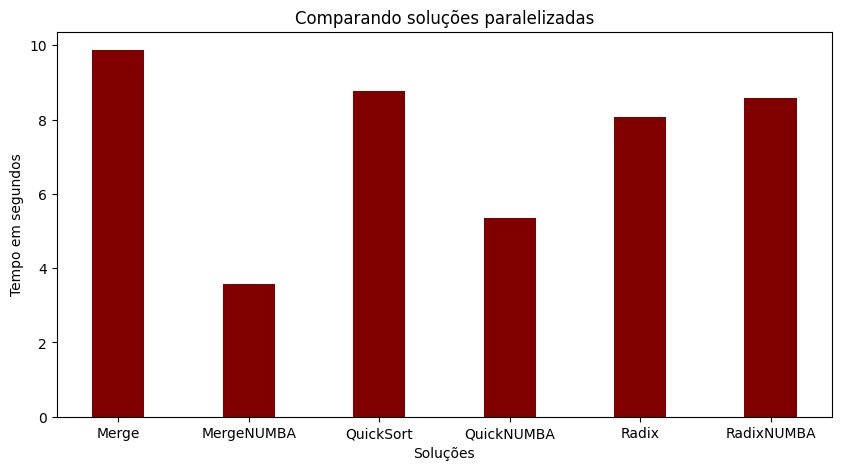

In [18]:


data = {'Merge':9.87420099800002, 'MergeNUMBA':3.586439050000081, 'QuickSort':8.776174018000006,
        'QuickNUMBA':5.362131482999757,'Radix':8.084604654000032,'RadixNUMBA':8.57374408800024}
x = list(data.keys())
y = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
 
plt.xlabel("Soluções")
plt.ylabel("Tempo em segundos")
plt.title("Comparando soluções paralelizadas")
plt.show()

### Conclusão :
O melhor resultado foi para o merge sort que ficou muito melhor utilizando mecanismos de ordenação para um array de 1 milhão de elementos . Já o radix não demonstrou melhora , pois basicamente ele não utiliza mecanismos do nopython .